# Decision Trees and Random Forests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get the Data

In [4]:
df = pd.read_csv('/content/loan_data.csv')

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
feat = ["purpose"]
df_final = pd.get_dummies(df,columns = feat, drop_first = True)

<Axes: xlabel='purpose', ylabel='count'>

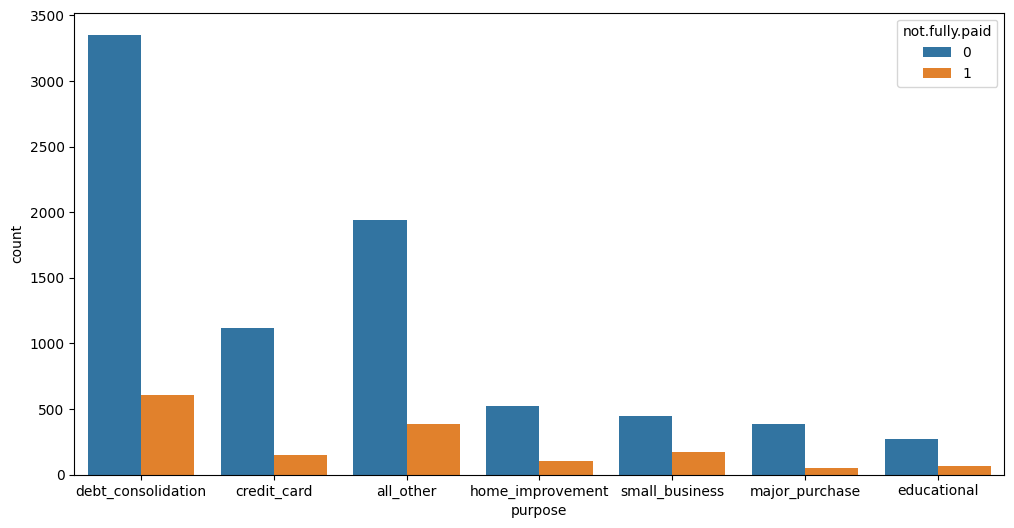

In [7]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df)

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2414
           1       0.22      0.24      0.23       460

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.75      0.75      2874



In [17]:
print(confusion_matrix(y_test,predictions))

[[2037  377]
 [ 351  109]]


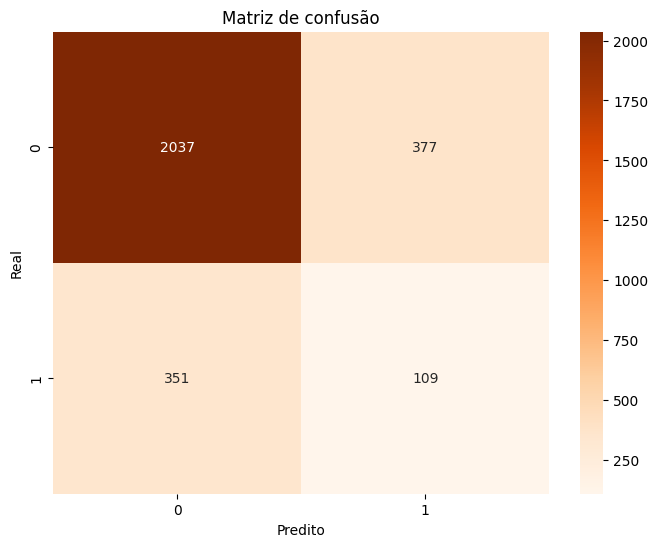

In [19]:
matriz = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

# Tree Visualization

In [20]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df_final.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [21]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Output hidden; open in https://colab.research.google.com to view.

# Pronto!